<a href="https://colab.research.google.com/github/Jane-Ngala/DSC14-Week-4-IP/blob/main/DSC14_Week_4_Core_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUTOLIB ELECTRIC CAR-SHARING SERVICE COMPANY RESEARCH

# Defining the Question

## a) Specifying the Data Analytic Question

To investigate a claim about the blue cars from the provided Autolib dataset.

- Claim : Bluecars usage is same on the weekends and the weekdays.

## b) Defining the Metric for Success

The Project will be successful once we are able to either Reject or  Accept the Null Hypothesis 

## c) Understanding the context 

Data to be analysed contains information on when the bluecars were taken and when returned (whether on a weekday or a weekend)

## d) Recording the Experimental Design

The Data provided will be investigated, cleaned then anlysed.

### e) Data Relevance

Does the data answer the research problem as  expected?

# Reading and Checking the Data

In [68]:
# Load all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro 
from scipy.stats import wilcoxon


In [2]:
# Load Dataset provided

url = 'http://bit.ly/DSCoreAutolibDataset'
autolib = pd.read_csv(url)

# Preview the top of the data
print(autolib.head())

# Preview bottom of the data
print(autolib.tail())

   Postal code      date  n_daily_data_points  dayOfWeek day_type  \
0        75001  1/1/2018                 1440          0  weekday   
1        75001  1/2/2018                 1438          1  weekday   
2        75001  1/3/2018                 1439          2  weekday   
3        75001  1/4/2018                 1320          3  weekday   
4        75001  1/5/2018                 1440          4  weekday   

   BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
0                 110                    103                 3   
1                  98                     94                 1   
2                 138                    139                 0   
3                 104                    104                 2   
4                 114                    117                 3   

   Utilib_returned_sum  Utilib_14_taken_sum  Utilib_14_returned_sum  \
0                    2                   10                       9   
1                    1                    8   

In [3]:
# Loading the Description Dataset

url = 'http://bit.ly/DSCoreAutolibDatasetGlossary' 
autolib_description = pd.read_excel(url)
autolib_description 

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [4]:
# To get the number of rows and columns of the data

autolib.shape

(16085, 13)

In [5]:
# Previewing information of our data

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Tidying the Dataset

In [6]:
# Dropping unnecessary columns

autolib.drop(columns = ['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'], axis =1, inplace = True )


In [7]:
# Previewing column names

autolib.columns

Index(['day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum'], dtype='object')

In [8]:
# Tidying the column names

autolib.columns = autolib.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
autolib.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['day_type', 'bluecars_taken_sum', 'bluecars_returned_sum'], dtype='object')

In [9]:
# Checking for missing values

autolib.isnull().any()

day_type                 False
bluecars_taken_sum       False
bluecars_returned_sum    False
dtype: bool

- There are no missing values

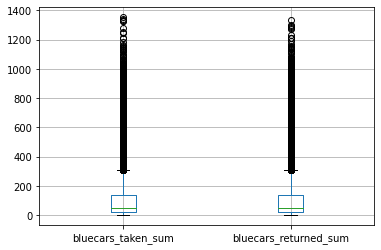

In [10]:
# Checking for outliers
# Blue cars taken and bluecars returned

autolib.boxplot(column=['bluecars_taken_sum', 'bluecars_returned_sum'])

In [11]:
# Removing the outliers 

Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)
IQR = Q3 - Q1
IQR


autolib = autolib[~((autolib < (Q1 - 1.5 * IQR)) |(autolib> (Q3 + 1.5 * IQR))).any(axis=1)]
autolib.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


(13826, 3)

In [15]:
# Checking for duplicates

autolib.duplicated().any()

True

- Duplicates are expected as number of either bluecars taken or returned can be equal on different days

# Descriptive Analysis

In [16]:
# Previewing the statistical attributes of the data

autolib.describe()


,bluecars_taken_sum,bluecars_returned_sum
count,13826.000000,13826.000000
mean,61.078403,61.027846
std,65.248846,64.960126
min,0.000000,0.000000
25%,17.000000,17.000000
50%,37.000000,37.000000
75%,80.000000,80.000000
max,307.000000,306.000000


# EDA

- Weekdays Data

In [17]:
# Creating a datframe for weekdays

autolib_wd = autolib[autolib.day_type == 'weekday']
autolib_wd 

,day_type,bluecars_taken_sum,bluecars_returned_sum
0,weekday,110,103
1,weekday,98,94
2,weekday,138,139
3,weekday,104,104
4,weekday,114,117
...,...,...,...
16078,weekday,12,13
16079,weekday,15,13
16080,weekday,15,10
16083,weekday,11,14


In [20]:
# Central Tendency and Dispersion of blue cars taken

autolib_wd['bluecars_taken_sum'].describe()

count    10046.000000
mean        59.376767
std         66.090508
min          0.000000
25%         16.000000
50%         34.000000
75%         76.000000
max        307.000000
Name: bluecars_taken_sum, dtype: float64

In [21]:
# Mode of bluecars taken 

autolib_wd['bluecars_taken_sum'].mode()

0    12
dtype: int64

- Weekends Data

In [23]:
# Creating a datframe for weekdays

autolib_we = autolib[autolib.day_type == 'weekend']
autolib_we 

,day_type,bluecars_taken_sum,bluecars_returned_sum
5,weekend,187,185
6,weekend,180,180
12,weekend,224,223
13,weekend,193,193
19,weekend,217,217
...,...,...,...
16068,weekend,36,33
16074,weekend,15,15
16075,weekend,34,32
16081,weekend,19,19


In [24]:
# Central Tendency and Dispersion of blue cars taken

autolib_we['bluecars_taken_sum'].describe()

count    3780.000000
mean       65.600794
std        62.741907
min         0.000000
25%        21.000000
50%        45.000000
75%        88.250000
max       307.000000
Name: bluecars_taken_sum, dtype: float64

In [25]:
# Mode of bluecars taken 

autolib_we['bluecars_taken_sum'].mode()

0    14
dtype: int64

# Univariate Analysis

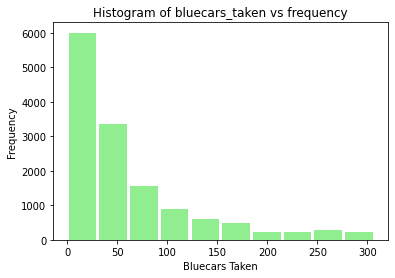

In [32]:
# Plotting a Blue cars taken histogram

freq_bluecars_taken = autolib['bluecars_taken_sum']

plt.hist(freq_bluecars_taken, bins=10, histtype='bar', rwidth=0.9, color = 'lightgreen')
plt.xlabel('Bluecars Taken')
plt.ylabel('Frequency')
plt.title('Histogram of bluecars_taken vs frequency')
plt.show()

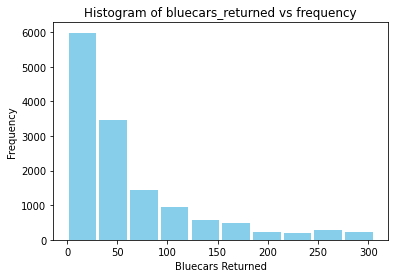

In [34]:
# Plotting bluecars returned 

plt.hist(autolib['bluecars_returned_sum'], bins=10, histtype='bar', rwidth=0.9, color = 'skyblue')
plt.xlabel('Bluecars Returned')
plt.ylabel('Frequency')
plt.title('Histogram of bluecars_returned vs frequency')
plt.show()

# Bivariate Analysis

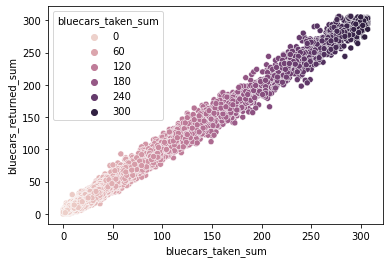

In [38]:
# Relationship between Blue cars taken and blue cars returned

sns.scatterplot(data = autolib, x="bluecars_taken_sum", y="bluecars_returned_sum", hue="bluecars_taken_sum")

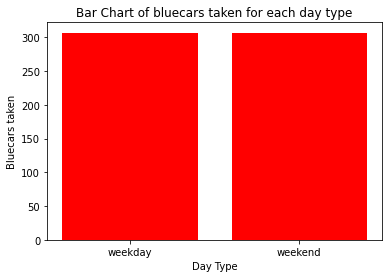

In [51]:
# Relationship between bluecars taken and the type of day

plt.bar(autolib['day_type'], autolib['bluecars_taken_sum'], color = 'yellowgreen')
plt.xlabel('Day Type')
plt.ylabel('Bluecars taken')
plt.title('Bar Chart of bluecars taken for each day type')
plt.show()


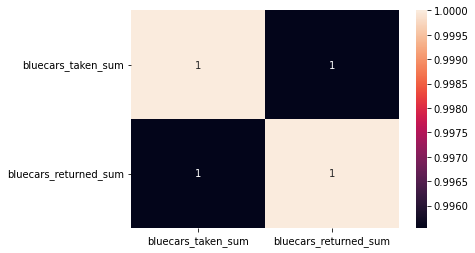

In [64]:
# showing correlation on a heatmap

sns.heatmap(autolib.corr(),annot=True)
plt.show()

# Sampling the Data

In [53]:
# To select a sample from the target population we shall use random sampling method
# Creating a sample for bluecars taken during weekdays

weekday_sample = autolib_wd['bluecars_taken_sum'].sample(n = 100, replace="False")
print(weekday_sample)


12398     33
15312     23
11075     35
14188     69
13212      0
        ... 
5784      64
790      215
12743     64
11997      1
1538     262
Name: bluecars_taken_sum, Length: 100, dtype: int64


In [55]:
# Creating a sample for bluecars taken over the weekend

weekend_sample = autolib_we['bluecars_taken_sum'].sample(n = 100, replace="False")
print(weekend_sample)

14619     94
10067    187
13156      6
14796     44
6642     117
        ... 
9546     246
7252      10
9415     146
87       176
7014      36
Name: bluecars_taken_sum, Length: 100, dtype: int64


In [58]:
# Testing for normality of the weekday sample
stat, p = shapiro(weekday_sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  


Statistics=0.756, p=0.000
Sample does not look Gaussian


In [59]:
# Testing for normality of the weekday sample
stat, p = shapiro(weekend_sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  


Statistics=0.825, p=0.000
Sample does not look Gaussian


In [60]:
# Populating the means for the samples

mean_wd = np.mean(weekday_sample)
mean_we = np.mean(weekend_sample)

print(mean_wd, mean_we)

56.22 62.0


# Hypothesis Testing

## Formulating the Null and Alternate Hypothesis

  

Ho = The average usage of bluecars during  weekdays is equal to average usage over the weekend

Ha = The average usage of bluecars during weekdays is different from average usage over the weekend


---


Ho = mean_wd = mean_we

Ha = mean_wd != mean_we

## Selecting Level of Significance

level of significance is denoted as alpha.

we shall set our alpha at 5%

alpha = 0.05

## Test Statistic and P-value

In [66]:
# Getting the sample details

print(weekday_sample.describe())
print(weekend_sample.describe())

count    100.000000
mean      56.220000
std       64.934712
min        0.000000
25%       14.000000
50%       35.000000
75%       69.000000
max      290.000000
Name: bluecars_taken_sum, dtype: float64
count    100.000000
mean      62.000000
std       57.922449
min        2.000000
25%       20.750000
50%       44.500000
75%       92.500000
max      299.000000
Name: bluecars_taken_sum, dtype: float64


In [72]:
# Compare samples
stat, p = wilcoxon(weekday_sample, weekend_sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Accept the Null Hypothesis (H0)')
else:
    print('Reject Null Hypothesis (H0)')


Statistics=2135.000, p=0.235
Accept the Null Hypothesis (H0)


# Conclusion

- Our claim is true: Bluecars usage on weekdays is equal to usage over the weekends